## 카카오톡 선물하기 분석

#### Selenium 패키지 & WebDriver 사용

In [1]:
from selenium import webdriver

In [2]:
wd = webdriver.Chrome('C:/Users/YJeong/CRWL_김연정/chromedriver_win32/chromedriver.exe')

#### 카카오톡 선물하기 페이지 > 베스트 쿠폰

In [3]:
wd.get('https://gift.kakao.com/best/coupon')

In [7]:
data = wd.page_source
soupData = BeautifulSoup(data, 'html.parser')
soupData

<html class="pc windows" lang="ko"><head>
<meta charset="utf-8"/>
<title>베스트 : 선물하기</title>
<base href="/"/>
<meta content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, width=device-width, viewport-fit=cover" name="viewport"/>
<!--g_preview_meta_s-->
<meta content="website" name="ogType" property="og:type"/>
<meta content="카카오톡 선물하기" name="ogTitle" property="og:title"/>
<meta content="지금, 내 마음을 전하는 가장 쉬운 방법" name="ogDescription" property="og:description"/>
<meta content="https://t1.daumcdn.net/gift/favicon/og-image.png" name="ogImage" property="og:image"/>
<!--g_preview_meta_e-->
<link href="https://t1.daumcdn.net/gift/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="https://t1.daumcdn.net/gift/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="https://gift-s.kakaocdn.net/dn/gift/common/kakaotalk_gift.png" rel="apple-touch-icon"/>
<link href="https://gift-s.kakaocdn.net/dn/gift/common/kakaot

#### '카페' 카테고리의 더보기 클릭

In [8]:
best = soupData.findAll('div', attrs={'class':'box_best'})
best

[<div _ngcontent-piq-c9="" class="box_best" data-tiara-layer="group"><h3 _ngcontent-piq-c9="" class="tit_best">카페</h3><div _ngcontent-piq-c9="" class="best_slide scroll_hori" gl-drag-hori-scroll=""><div _ngcontent-piq-c9="" class="wrapper" style="width: 2814px;"><ul _ngcontent-piq-c9="" class="list_slide" data-tiara-layer="slider"><!-- --><!-- --><!-- --><li _ngcontent-piq-c9="" class="wrap_product"><gl-link _ngcontent-piq-c9="" _nghost-piq-c6="" cutiara="" data-tiara-author="br_6" data-tiara-id="it_1389217" data-tiara-ordnum="1" data-tiara-provider="ca_14" data-tiara-setnum="1"><!-- --><!-- --><a _ngcontent-piq-c6="" class="link_product" href="/product/2058524?from=best"><!-- --><span _ngcontent-piq-c9="" class="thumb_product"><!-- --><span _ngcontent-piq-c9="" class="frame_mask"><span _ngcontent-piq-c9="" class="inner_mask"><em _ngcontent-piq-c9="" class="emph_rank"><span _ngcontent-piq-c9="" class="screen_out">랭킹순위</span> 1 </em></span></span><img _ngcontent-piq-c9="" class="img_thu

In [9]:
best_cafe = soupData.find('h3', text='카페')
best_cafe = best_cafe.parent

In [10]:
best_cafe = soupData.find('h3', text='카페').parent.find('a', attrs={'class':'link_more'})
best_cafe

<a _ngcontent-piq-c6="" class="link_more" href="/best/coupon/14"><!-- --><span _ngcontent-piq-c9="" class="screen_out">카페</span> 더보기 <span _ngcontent-piq-c9="" class="ico_best"></span><!-- --></a>

##### 웹드라이버로 클릭

In [11]:
wd.find_element_by_xpath("//span[contains(text(),'카페')]/ancestor::a[@class='link_more']").click()

In [12]:
wd.find_element_by_xpath("//span[contains(text(),'아이스크림')]/ancestor::a[@class='link_more']").click()

In [13]:
element = wd.find_element_by_xpath("//span[contains(text(),'카페')]/ancestor::a[@class='link_more']")

In [14]:
wd.execute_script("arguments[0].click();", element)

#### 카카오톡 선물하기 페이지 > 베스트 > 카페

In [15]:
wd.get('https://gift.kakao.com/best/coupon/14')

In [16]:
data = wd.page_source
data

'<html lang="ko" class="pc windows"><head>\n    <meta charset="utf-8">\n    <title>베스트 : 선물하기</title>\n    <base href="/">\n    <meta name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, width=device-width, viewport-fit=cover">\n    <!--g_preview_meta_s-->\n    <meta name="ogType" property="og:type" content="website">\n    <meta name="ogTitle" property="og:title" content="카카오톡 선물하기">\n    <meta name="ogDescription" property="og:description" content="지금, 내 마음을 전하는 가장 쉬운 방법">\n    <meta name="ogImage" property="og:image" content="https://t1.daumcdn.net/gift/favicon/og-image.png">\n    <!--g_preview_meta_e-->\n    <link rel="icon" type="image/png" href="https://t1.daumcdn.net/gift/favicon/favicon-32x32.png" sizes="32x32">\n    <link rel="icon" type="image/png" href="https://t1.daumcdn.net/gift/favicon/favicon-16x16.png" sizes="16x16">\n    <link rel="apple-touch-icon" href="https://gift-s.kakaocdn.net/dn/gift/common/kakaotalk_gift.png">\n    

#### 스크롤 끝까지 내리기

In [17]:
from time import sleep

In [18]:
page_height = wd.execute_script("return document.body.scrollHeight")

while True:
    wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(1)
    scroll_height = wd.execute_script("return document.body.scrollHeight")
    
    print(page_height, scroll_height)
    
    if page_height == scroll_height:
        break
    page_height = scroll_height
    
data = wd.page_source

7193 13733
13733 20273
20273 26813
26813 33353
33353 33353


#### BeautifulSoup4 이용하여 파싱

In [6]:
from bs4 import BeautifulSoup

In [19]:
soupData = BeautifulSoup(data, 'html.parser')
soupData

<html class="pc windows" lang="ko"><head>
<meta charset="utf-8"/>
<title>베스트 : 선물하기</title>
<base href="/"/>
<meta content="user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, width=device-width, viewport-fit=cover" name="viewport"/>
<!--g_preview_meta_s-->
<meta content="website" name="ogType" property="og:type"/>
<meta content="카카오톡 선물하기" name="ogTitle" property="og:title"/>
<meta content="지금, 내 마음을 전하는 가장 쉬운 방법" name="ogDescription" property="og:description"/>
<meta content="https://t1.daumcdn.net/gift/favicon/og-image.png" name="ogImage" property="og:image"/>
<!--g_preview_meta_e-->
<link href="https://t1.daumcdn.net/gift/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="https://t1.daumcdn.net/gift/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="https://gift-s.kakaocdn.net/dn/gift/common/kakaotalk_gift.png" rel="apple-touch-icon"/>
<link href="https://gift-s.kakaocdn.net/dn/gift/common/kakaot

In [20]:
products = soupData.findAll('span', attrs={'class':'detail_product'})
len(products)

101

##### 광고 상품

In [21]:
products[0]

<span _ngcontent-eci-c8="" class="detail_product"><em _ngcontent-eci-c8="" class="emph_notice"><span _ngcontent-eci-c8="" class="ico_best">알림</span> AD 상품입니다. </em><span _ngcontent-eci-c8="" class="tit_product">"윈터 판타지" 20Xmas 스트로베리 페스티벌</span><em _ngcontent-eci-c8="" class="txt_price ng-binding"><span _ngcontent-eci-c8="" class="screen_out">할인 된 금액</span> 45,000 <span _ngcontent-eci-c8="" class="txt_won">원</span></em><span _ngcontent-eci-c8="" class="txt_store">투썸플레이스</span></span>

In [22]:
ad_info = list(products[0].strings)
ad_info

['알림',
 ' AD 상품입니다. ',
 '"윈터 판타지" 20Xmas 스트로베리 페스티벌',
 '할인 된 금액',
 ' 45,000 ',
 '원',
 '투썸플레이스']

##### 일반 상품

In [23]:
products[1]

<span _ngcontent-eci-c9="" class="detail_product"><strong _ngcontent-eci-c9="" class="txt_rank"><span _ngcontent-eci-c9="" class="screen_out">순위</span><!-- --><!-- --><span _ngcontent-eci-c9="" class="ico_best ico_gold"></span><!-- --><!-- --><span _ngcontent-eci-c9="" class="txt_number">1</span></strong><span _ngcontent-eci-c9="" class="tit_product">"부드러운 디저트" 부드러운 생크림 카스텔라 + 아메리카노 Tall 2잔</span><em _ngcontent-eci-c9="" class="txt_price ng-binding"><span _ngcontent-eci-c9="" class="screen_out">할인 된 금액</span> 12,700 <span _ngcontent-eci-c9="" class="txt_won">원</span></em><span _ngcontent-eci-c9="" class="txt_store">스타벅스</span></span>

In [24]:
product_info = list(products[1].strings)
product_info

['순위',
 '1',
 '"부드러운 디저트" 부드러운 생크림 카스텔라 + 아메리카노 Tall 2잔',
 '할인 된 금액',
 ' 12,700 ',
 '원',
 '스타벅스']

In [25]:
rank = product_info[1]
rank

'1'

In [26]:
name = product_info[2]
name

'"부드러운 디저트" 부드러운 생크림 카스텔라 + 아메리카노 Tall 2잔'

In [27]:
price = product_info[4].strip()
price

'12,700'

In [28]:
brand = product_info[6]
brand

'스타벅스'

#### 광고 상품 판별하기

In [29]:
product_rank = products[0].find('strong', attrs={'class':'txt_rank'})
product_rank

In [30]:
product_rank == None

True

In [31]:
product_rank = products[1].find('strong', attrs={'class':'txt_rank'})
product_rank

<strong _ngcontent-eci-c9="" class="txt_rank"><span _ngcontent-eci-c9="" class="screen_out">순위</span><!-- --><!-- --><span _ngcontent-eci-c9="" class="ico_best ico_gold"></span><!-- --><!-- --><span _ngcontent-eci-c9="" class="txt_number">1</span></strong>

In [32]:
product_rank == None

False

### 빈도 수 체크하기

In [33]:
from collections import Counter

In [36]:
product_table = pd.read_csv("./kakao_gift_카페.csv", encoding="cp949")
product_table.head()

,Unnamed: 0,rank,brand,name,price
0,0,1,스타벅스,"""부드러운 디저트"" 부드러운 생크림 카스텔라 + 아메리카노 Tall 2잔","12,700"
1,1,2,스타벅스,"""오늘도 달콤하게"" 7 레이어 가나슈 케이크 + 아메리카노 Tall","9,800"
2,2,3,투썸플레이스,"""윈터 판타지"" 20Xmas 스트로베리 초콜릿 생크림","34,000"
3,3,4,스타벅스,"""해피 크리스마스"" 리얼 스트로베리 티라미수+아메리카노 T 2잔","15,700"
4,4,5,스타벅스,"""APP 전용"" e카드 3만원 교환권","30,000"


In [37]:
brand = product_table['brand']

In [38]:
count = Counter(brand)
count

Counter({'스타벅스': 50, '투썸플레이스': 34, '공차': 5, '이디야커피': 8, '메가커피': 3})

In [39]:
count.most_common(10)

[('스타벅스', 50), ('투썸플레이스', 34), ('이디야커피', 8), ('공차', 5), ('메가커피', 3)]

In [40]:
brand_count = pd.DataFrame.from_dict(count, orient='index').reset_index()
brand_count.columns = ['brand', 'count']
brand_count

,brand,count
0,스타벅스,50
1,투썸플레이스,34
2,공차,5
3,이디야커피,8
4,메가커피,3


### 막대그래프 그리기

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,7)

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

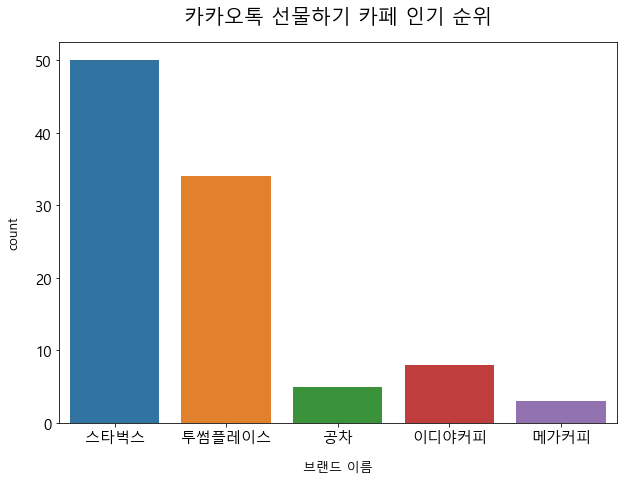

In [42]:
bar = sns.barplot(data=brand_count, x='brand', y='count')
bar.axes.set_title("카카오톡 선물하기 카페 인기 순위", pad=20, fontsize=20)
bar.set_xlabel("브랜드 이름", labelpad=15, fontsize=13)
bar.set_ylabel("count", labelpad=15, fontsize=13)
bar.tick_params(labelsize=15)
plt.show()

### 워드 클라우드

In [43]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\yjeong\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
from wordcloud import WordCloud

In [45]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', max_font_size=300)

In [46]:
wc.generate_from_frequencies(count)
wc.to_file('cafe_brand.png')

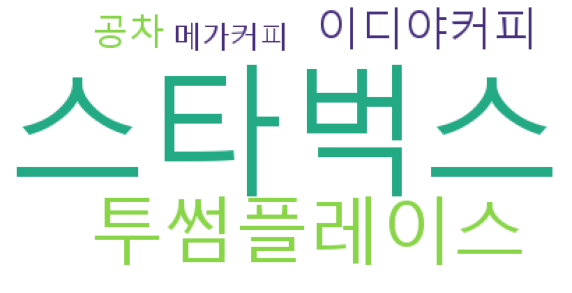

In [47]:
plt.imshow(wc)
plt.axis('off')
plt.show()

### 분석 함수

In [50]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd

from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [59]:
def infinite_scroll(wd):
    page_height = wd.execute_script("return document.body.scrollHeight")

    print("SCROLLING START")
    
    while True:
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        sleep(1)
        scroll_height = wd.execute_script("return document.body.scrollHeight")

        if page_height == scroll_height:
            break
        page_height = scroll_height
    
    print("SCROLLING FINISHED")
    
    return

In [60]:
def crawl_kakao_gift(result, category):
    url = 'https://gift.kakao.com/best/coupon'
    wd = webdriver.Chrome('C:/Users/YJeong/CRWL_김연정/chromedriver_win32/chromedriver.exe')
    
    wd.get(url)
    print("OPEN PAGE : " + url)
    sleep(5)
    
    infinite_scroll(wd)
    
    # 카테고리 클릭
    sleep(5)
    element = wd.find_element_by_xpath("//span[contains(text(),"+ category +")]/ancestor::a[@class='link_more']")
    wd.execute_script("arguments[0].click();", element)
    print("CLICK CATEGORY : " + category)
    sleep(5)
    
    infinite_scroll(wd)
    
    data = wd.page_source
    soupData = BeautifulSoup(data, 'html.parser')
    products = soupData.findAll('span', attrs={'class':'detail_product'})
    
    for product in products:
        # 광고 상품 판별
        product_rank = product.find('strong', attrs={'class':'txt_rank'})
        if product_rank == None:
            continue
        
        info = list(product.strings)
        
        rank = info[1]
        name = info[2]
        price = info[4].strip()
        brand = info[6]
        
        print(rank, name, price, brand)        
        result.append([rank] + [brand] + [name] + [price])
        
    return

In [61]:
def count_word(category):
    product_table = pd.read_csv("./kakao_gift_" + category + ".csv", encoding="cp949")
    brand = product_table['brand']
    brand_count = Counter(brand)
    brand_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
    brand_df.columns = ['brand', 'count']
    
    return brand_count, brand_df

In [62]:
def make_bar_chart(category, brand_df):
    bar = sns.barplot(data=brand_df, x='brand', y='count')
    bar.axes.set_title("카카오톡 선물하기 " + category + " 인기 순위", pad=20, fontsize=20)
    bar.set_xlabel("브랜드 이름", labelpad=15, fontsize=13)
    bar.set_ylabel("count", labelpad=15, fontsize=13)
    bar.tick_params(labelsize=15)
    plt.show()
    
    return

In [63]:
def make_colors(word, font_size, position, orientation, random_state, **kwargs):
    r = random_state.randint(0, 255)
    g = random_state.randint(0, 255)
    b = random_state.randint(0, 255)
    
    color = "rgb(%d, %d, %d)" % (r, g, b)
    
    return color

In [67]:
def make_word_cloud(category, brand_count):
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                   background_color='white', max_font_size=1000)
    generate = wc.generate_from_frequencies(brand_count)
    re_color_wc = generate.recolor(color_func=make_colors, random_state=True)

    plt.imshow(re_color_wc, interpolation='lanczos')
    plt.axis('off')
    plt.show()
    
    wc.to_file('brand_' + category + '.png')
    
    return

In [65]:
def main():
    result = []
    category = '카페'
    
    print('---CRAWLING START---')
    
    crawl_kakao_gift(result, category)
    
    product_table = pd.DataFrame(result, columns=('rank', 'brand', 'name', 'price'))
    product_table.to_csv("./kakao_gift_" + category + ".csv", encoding="cp949", mode='w', index=True)
    
    print('---CRAWLING FINISH---')
    
    brand_count, brand_df = count_word(category)
    
    make_bar_chart(category, brand_df)
    
    make_word_cloud(category, brand_count)

---CRAWLING START---
OPEN PAGE : https://gift.kakao.com/best/coupon
SCROLLING START
SCROLLING FINISHED
CLICK CATEGORY : 카페
SCROLLING START
SCROLLING FINISHED
1 "부드러운 디저트" 부드러운 생크림 카스텔라 + 아메리카노 Tall 2잔 12,700 스타벅스
2 "윈터 판타지" 20Xmas 스트로베리 초콜릿 생크림 34,000 투썸플레이스
3 "해피 크리스마스" 리얼 스트로베리 티라미수+아메리카노 T 2잔 15,700 스타벅스
4 "오늘도 달콤하게" 7 레이어 가나슈 케이크 + 아메리카노 Tall 9,800 스타벅스
5 "APP 전용" e카드 3만원 교환권 30,000 스타벅스
6 "생일 축하합니다" 블루베리 쿠키 치즈 케이크 + 아메리카노 Tall 2잔 15,100 스타벅스
7 "힘이 나는 세트" 촉촉 초콜릿 생크림 케이크 + 진한 얼 그레이 생크림 케이크 + 아메리카노 Tall 2잔 20,300 스타벅스
8 카페아메리카노 Tall 4,100 스타벅스
9 "기분좋은 하루" 클라우드 치즈 케이크 + 아메리카노 Tall 2잔 13,700 스타벅스
10 "달콤한 겨울" 다크 초콜릿 T + 화이트 밀크 케이크 12,800 스타벅스
11 "APP 전용" e카드 5만원 교환권 50,000 스타벅스
12 아이스 카페아메리카노 Tall 4,100 스타벅스
13 "축하합니다" 7레이어 가나슈 케이크 + 클라우드 치즈 케이크 + 아메리카노 Tall 2잔 19,400 스타벅스
14 스윗 투게더 (6pcs) 36,200 투썸플레이스
15 "윈터 판타지" 20Xmas 마스카포네 생크림(믹스드베리) 32,000 투썸플레이스
16 "윈터 판타지" 20Xmas 딸기 생크림 1호 29,000 투썸플레이스
17 "해피 B day" 떠먹는 티라미수 + 아메리카노 Regular 2잔 14,100 투썸플레이스
18 "달콤한 하루 세트" 떠먹는 스트로베리 초콜릿 생크림 + 아메

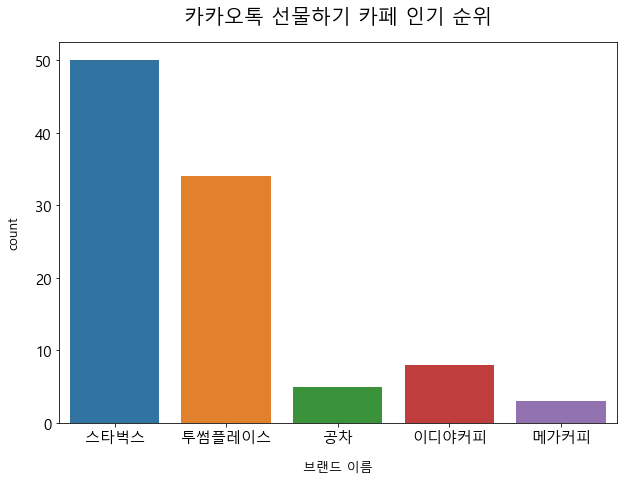

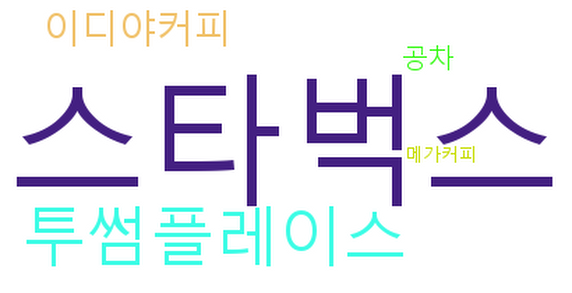

In [68]:
main()